In [1]:
!pip install contextily
!pip install imageio

In [2]:
from contextily import Place
import contextily as cx
import rasterio
from matplotlib import pyplot as plt
import imageio as iio
from rasterio.plot import show as rioshow
import matplotlib.transforms as mtransforms

In [9]:
scqIT = Place("Italy", path="Italy.tif", source=cx.providers.OpenStreetMap.Mapnik,
              zoom=6)

rIt = rasterio.open("Italy.tif")

Place : Italia | n_tiles: 1 | zoom : 6 | im : (1024, 768)

In [8]:
#scqAL = Place("Monteforte Cilento", path="Alento.tif", source=cx.providers.MapTiler.Satellite,
#            zoom=11)

In [4]:
Campania = rasterio.open("Alento.tif")
Campania_ext =[Campania.bounds[0], Campania.bounds[2], Campania.bounds[1], Campania.bounds[3]]

/tmp/ipykernel_945887/786708419.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread('aerial_pic.png')


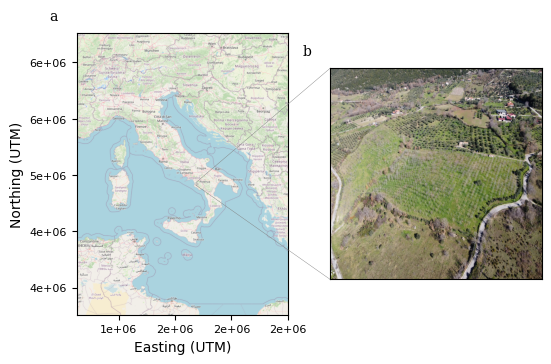

In [11]:
mosaic = '''
        ab
        '''
fig, axs = plt.subplot_mosaic(mosaic,figsize=(6,6))


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


rioshow(rIt,ax=axs['a'])
axs['a'].set_xlabel('Easting (UTM)')
axs['a'].set_ylabel('Northing (UTM)')

from matplotlib.ticker import FormatStrFormatter

axs['a'].yaxis.set_major_formatter(FormatStrFormatter('%1.e'))
axs['a'].xaxis.set_major_formatter(FormatStrFormatter('%1.e'))
axs['a'].tick_params(axis='both', labelsize=8)

mark_inset(axs['a'],axs['b'],loc1=2, 
           loc2=3,
           lw=0.3,
           fc="none", 
           ec='grey'
          )

img = iio.imread('aerial_pic.png')
axs['b'].imshow(img,extent=Campania_ext)
axs['b'].axes.get_xaxis().set_visible(False)
axs['b'].axes.get_yaxis().set_visible(False)

for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')

fig.savefig('map_asiago_article.png', dpi=350)
